Detected location: Ullal (lat: 12.8049, lon: 74.8549)


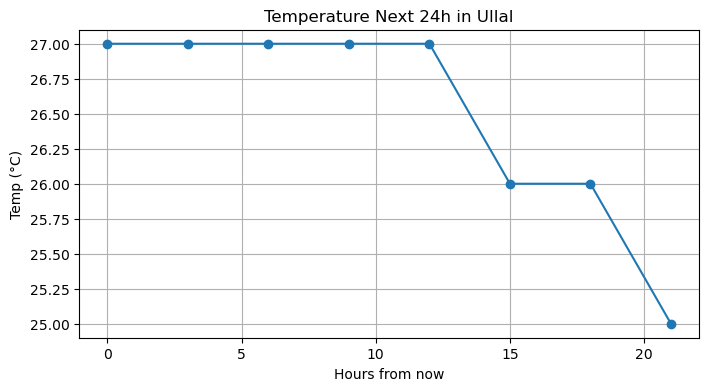

In [8]:
import requests
import matplotlib.pyplot as plt

# 1️⃣ Get your geolocation based on IP (auto-detect city)
geo = requests.get("http://ip-api.com/json").json()
city = geo.get("city", "Unknown")
lat, lon = geo.get("lat"), geo.get("lon")
print(f"Detected location: {city} (lat: {lat}, lon: {lon})")

# 2️⃣ Fetch weather from wttr.in (no API key)
url = f"http://wttr.in/{lat},{lon}?format=j1"
resp = requests.get(url)
data = resp.json()

temps = [float(fore["tempC"]) for fore in data["weather"][0]["hourly"][:8]]
times = [i * 3 for i in range(len(temps))]

# 3️⃣ Plot
plt.figure(figsize=(8,4))
plt.plot(times, temps, marker='o')
plt.title(f"Temperature Next 24h in {city}")
plt.xlabel("Hours from now")
plt.ylabel("Temp (°C)")
plt.grid(True)
plt.show()


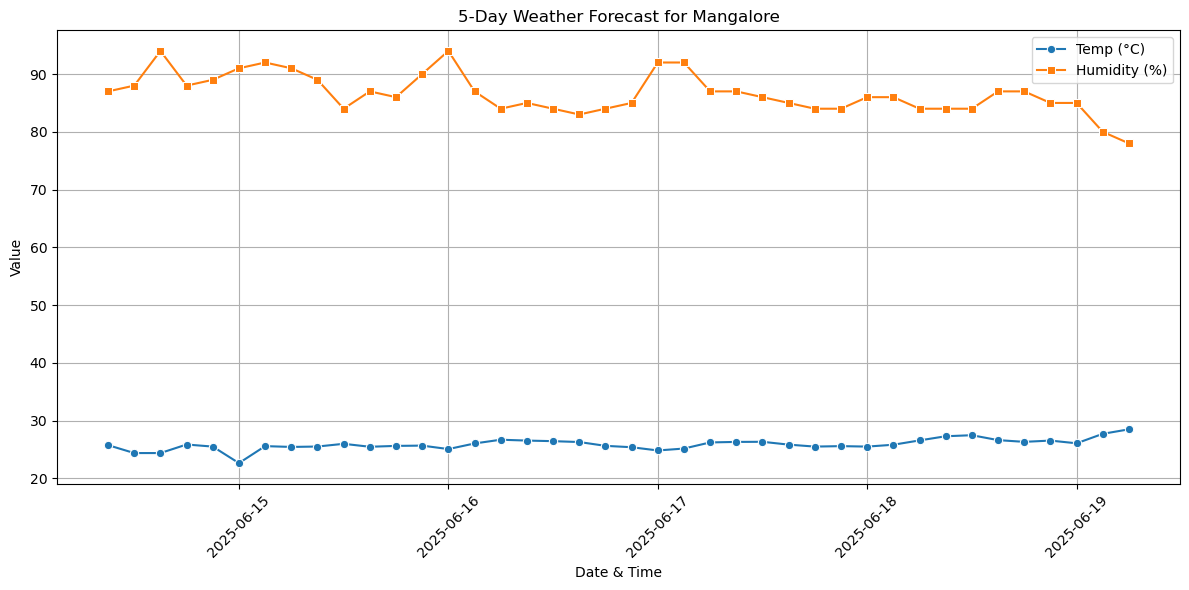

In [13]:
# 📦 Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔑 Enter your OpenWeatherMap API Key
API_KEY = '20f7454e4a718f4510848cdd2a622e70'  # Replace with your actual API key
CITY = 'Mangalore'  # Change to any city you like

# 🌐 Define API Endpoint
url = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"

# 📡 Fetch Weather Forecast Data
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    
    # 🗂️ Extract Forecast Data
    forecasts = data['list']
    forecast_data = {
        'DateTime': [],
        'Temperature (°C)': [],
        'Humidity (%)': [],
        'Weather': []
    }

    for entry in forecasts:
        forecast_data['DateTime'].append(entry['dt_txt'])
        forecast_data['Temperature (°C)'].append(entry['main']['temp'])
        forecast_data['Humidity (%)'].append(entry['main']['humidity'])
        forecast_data['Weather'].append(entry['weather'][0]['main'])

    df = pd.DataFrame(forecast_data)
    df['DateTime'] = pd.to_datetime(df['DateTime'])

    # 📊 Visualization
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='DateTime', y='Temperature (°C)', data=df, marker='o', label='Temp (°C)')
    sns.lineplot(x='DateTime', y='Humidity (%)', data=df, marker='s', label='Humidity (%)')
    plt.title(f"5-Day Weather Forecast for {CITY}")
    plt.xlabel("Date & Time")
    plt.ylabel("Value")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
else:
    print(f"❌ Failed to fetch data: {response.status_code}")
